In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools

In [3]:
df= pd.read_csv(r"D:\Personal ML Project\Diabetes Prediction\diabetes - Copy - Copy 2.csv")

In [4]:
df = df.drop(['glyhb','gender','time.ppn'], axis=1)

In [15]:
df.head(4)

,chol,stab.glu,hdl,Chl/hdl Ratio,age,height,weight,bp.1s,bp.1d,waist,hip,WHR,DM-2,GenderB
0,189,96,47,4.0,28,64,200,136,52,38,45,0.844444,0,0
1,185,84,52,3.6,53,61,145,147,72,37,40,0.925000,0,0
2,206,85,46,4.5,67,67,178,119,68,37,41,0.902439,0,1
3,218,182,54,4.0,51,67,215,139,69,42,53,0.792453,1,0


In [5]:
X = df.drop('DM-2', axis=1)
Y = df['DM-2']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = True,  random_state = 8)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 13)
(248,)
(62, 13)
(62,)


In [8]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = decision_tree_model.predict(X_test)
decision_tree_model.score(X_test, y_test)

0.8387096774193549

In [12]:
df1 = pd.read_csv(r"D:\Personal ML Project\Diabetes Prediction\Book1.csv")

In [16]:
df1 = df1.drop(['glyhb','gender','time.ppn'], axis=1)

In [17]:
df1.head(5)

,chol,stab.glu,hdl,Chl/hdl Ratio,age,height,weight,bp.1s,bp.1d,waist,hip,WHR,DM-2,GenderB
0,203,82,56,3.6,46,62,121,118,59,29,38,0.763158,0,0
1,165,97,24,6.9,29,64,218,112,68,46,48,0.958333,0,0
2,228,92,37,6.2,58,61,256,190,92,49,57,0.859649,0,0
3,78,93,12,6.5,67,67,119,110,50,33,38,0.868421,0,1
4,249,90,28,8.9,64,68,183,138,80,44,41,1.073171,1,1


In [18]:
# M = X; N = y
M = df1.drop('DM-2', axis=1)
N = df1['DM-2']

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc

Text(91.68, 0.5, 'Actual label')

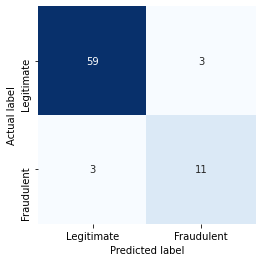

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

y_pred = decision_tree_model.predict(M) > 0.5
mat = confusion_matrix(N, y_pred)
labels = ['Legitimate', 'Fraudulent']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [23]:
print("Accuracy score when nothing is done = ",accuracy_score(N, y_pred.round())*100)
print(precision_score(N, y_pred.round())*100)
print(recall_score(N, y_pred.round())*100)
print(f1_score(N, y_pred.round()))

Accuracy score when nothing is done =  92.10526315789474
78.57142857142857
78.57142857142857
0.7857142857142857


In [25]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(N, y_pred)
print("required MCC value = ",mcc)

required MCC value =  0.7373271889400922
